# Mapas

In [2]:
library(sf)
library(ggplot2)
library(readxl)
library(tidyverse)
library(dplyr)
library(tidyr)
library(plotly)

In [3]:
map_data <- st_read("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson")

Reading layer `barrios' from data source 
  `https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson' 
  using driver `GeoJSON'
Simple feature collection with 48 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -58.53152 ymin: -34.70529 xmax: -58.33516 ymax: -34.52649
Geodetic CRS:  WGS 84


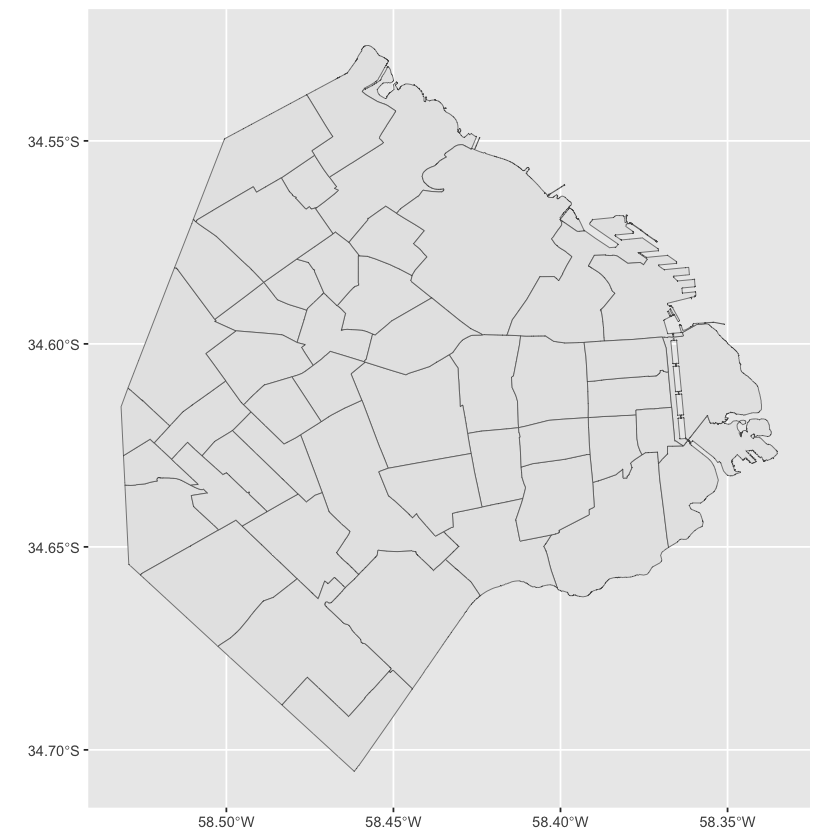

In [4]:
ggplot() + geom_sf(data = map_data)

Haciendo uso del mapa graficamos las ubicaciones de las casas que se encuentran en venta de la base de datos properati

In [5]:
setwd("/Users/ppando/Materias/data/materias/exploracion-visualizacion/R")

In [8]:
datos <- read_excel("Properati2.xlsx")
head(datos)

id     ad_type   start_date end_date   created_on lat       lon      
1 257134 Propiedad 2019-08-17 9999-12-31 2019-08-17 -58.42074 -34.63177
2 383947 Propiedad 2019-10-23 2019-11-08 2019-10-23 -58.42078 -34.60864
3 986212 Propiedad 2019-08-01 2019-08-14 2019-08-01 -58.37139 -34.62184
4 884685 Propiedad 2020-04-02 2020-04-03 2020-04-02        NA        NA
5 777663 Propiedad 2020-02-29 2020-03-06 2020-02-29 -58.45321 -34.59572
6 556695 Propiedad 2019-11-29 2020-01-21 2019-11-29 -58.44911 -34.60882
  l1        l2              l3            ⋯ operation_type price  luminoso
1 Argentina Capital Federal Boedo         ⋯ Venta          140000 0       
2 Argentina Capital Federal Almagro       ⋯ Venta          155000 0       
3 Argentina Capital Federal San Telmo     ⋯ Venta           74000 0       
4 Argentina Capital Federal Villa Urquiza ⋯ Venta          208000 1       
5 Argentina Capital Federal Villa Crespo  ⋯ Venta          119000 1       
6 Argentina Capital Federal Caballito     ⋯ Venta          244000 0       
  reciclado expensas espectacular quincho terraza escalera galeria
1 0         0        0            0       0       1        0      
2 0         1        0            0       0       0        1      
3 0         0        0            0       0       0        0      
4 0         1        0            0       1       1        0      
5 0         1        0            0       0       0        0      
6 0         0        0            0       0       0        0

In [10]:
df <- datos %>% select(-c(start_date, end_date, created_on, title, description))

In [11]:
df <- df %>% filter(l1 == "Argentina", l2 == "Capital Federal", property_type == "PH", operation_type == "Venta")

In [12]:
barrio_data <- df %>% filter(lon >= -35 & lon <= -33 & lat >= -58.55 & lat <= -58.30)

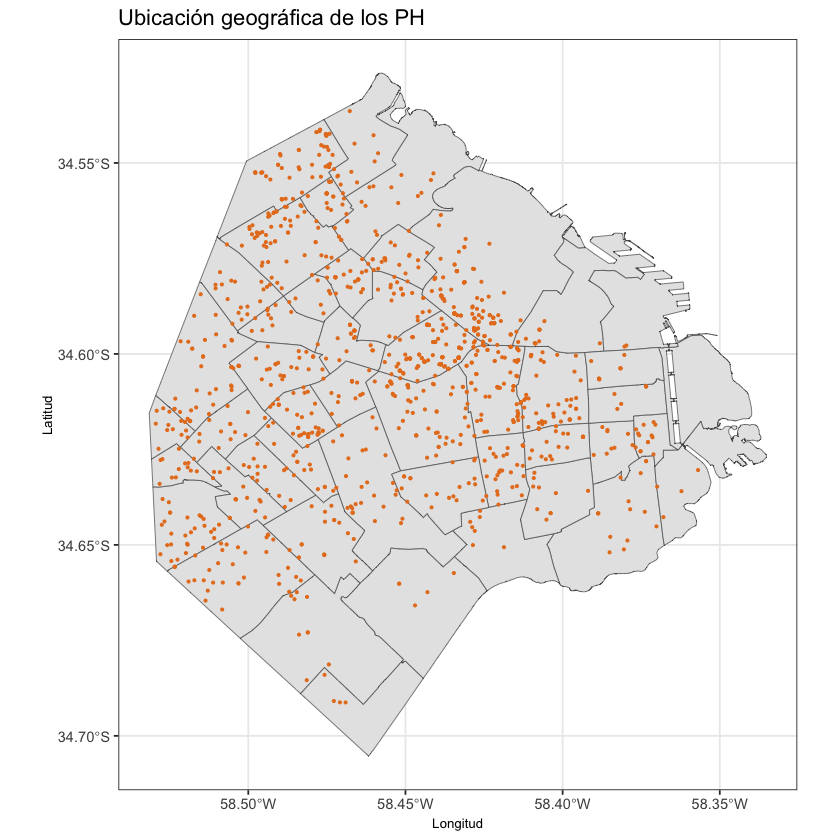

In [13]:
ggplot() +
  geom_sf(data = map_data) +  # Plot the map
  geom_point(data = barrio_data, aes(x = lat, y = lon), color = "#E67E22", size = 0.5) +
  labs(title = "Ubicación geográfica de los PH", x = "Longitud", y = "Latitud") +
  theme_bw() +
  xlab("Longitud") +
  ylab("Latitud") +
  theme(axis.title.x = element_text(size = 8), axis.title.y = element_text(size = 8))

Ahora vamos a graficar el precio promedio por barrio

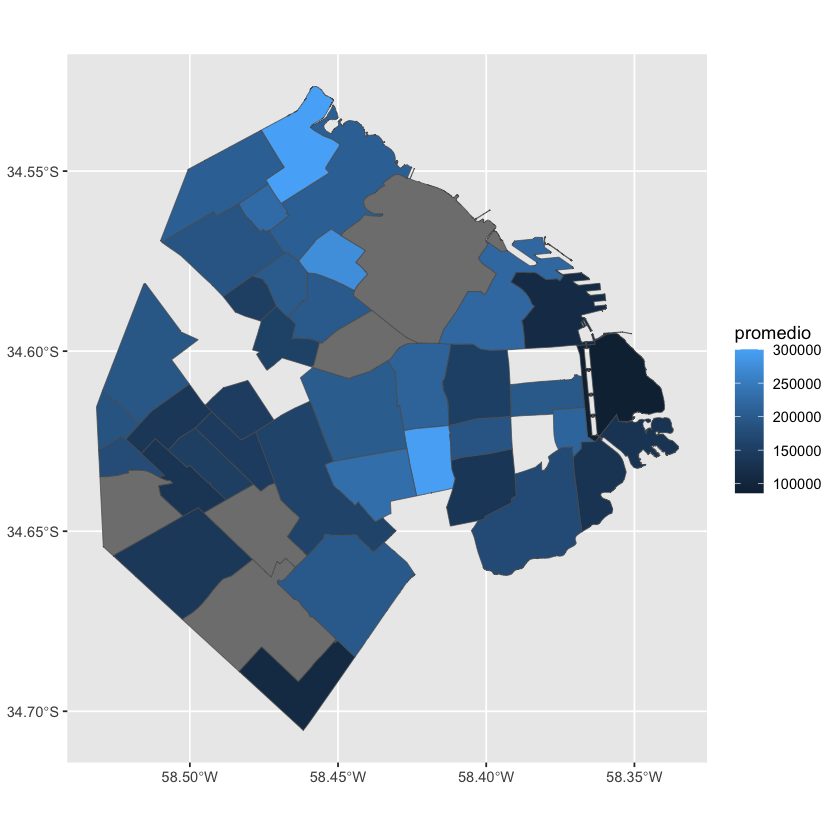

In [14]:
precio_promedio <- datos %>% 
    group_by(l3) %>% 
    summarise(promedio = mean(price)) %>% 
    rename(nombre = l3)

prec_promedio_capital <- inner_join(map_data, precio_promedio, by = "nombre")

ggplot(data = prec_promedio_capital) + 
    geom_sf(aes(fill = promedio))

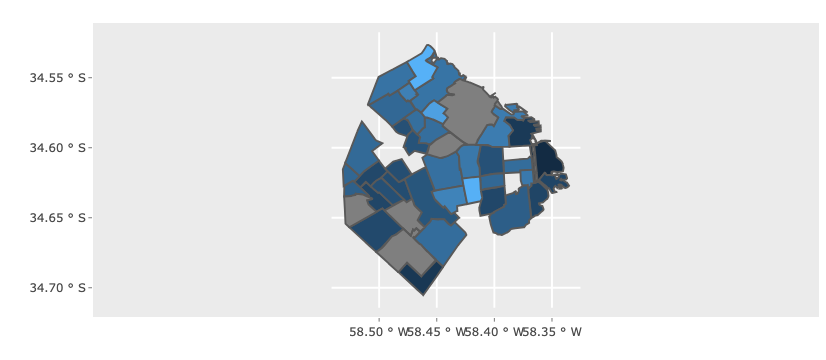

In [15]:
grafico_inter <- ggplot(data = prec_promedio_capital) +
  geom_sf(aes(fill = promedio))

ggplotly(grafico_inter)